In [1]:
%config Completer.use_jedi = False
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex
from multiprocessing import Pool

import sys
sys.path.append("/end/home/rh2310/morpho_repo/amplitude_method")
from utils import *

import warnings
warnings.filterwarnings("ignore")

In [2]:
init_printing(use_latex='mathjax')#(use_latex=True)

#### Define a list of parameters

In [3]:
U, V, A, B, C, D, E, F, aTc = symbols('U, V, A, B, C, D, E, F, aTc', real=True, positive = True)

(b_A, b_B, b_C, b_D, b_E, b_F, 
K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc,
μ_U, μ_V, μ_B, μ_C, μ_D, μ_E, μ_F, μ_aTc) = symbols(
    'b_A, b_B, b_C, b_D, b_E, b_F, K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, mu_U, mu_V, mu_B, mu_C, mu_D, mu_E, mu_F, mu_aTc', 
    real=True, positive = True)

k, n_aTc, n = symbols('k, n_{aTc}, n', integer=True)

> The PDEs are as follows

<h3><center>$
   \frac{\partial U}{\partial t} =  A - \mu_U U + \Delta U, 
$</center></h3><h3><center>$
   \frac{\partial V}{\partial t} =  B - \mu_V V + \Delta V, 
$</center></h3><h3><center>$
     \frac{\partial A}{\partial t} = (b_A)^2  +   b_A  \times \frac{1}{1+\left(\frac{D}{ K_{DA}}\right)^{n_{DA}}} -  A,
$</center></h3><h3><center>$     \frac{\partial B}{\partial t} = \mu_B \left[ (b_B)^2  +   b_B  \times  \frac{1}{1+\left(\frac{K_{AB}}{U}\right)^{n_{AB}}} \times \frac{1}{1+\left(\frac{E}{ K_{EB}}\right)^{n_{EB}}} -  B \right],
$</center></h3><h3><center>$
\frac{\partial C}{\partial t} = \mu_C \left[ (b_C)^2  +   b_C  \times \frac{1}{1+\left(\frac{D}{ K_{DA}}\right)^{n_{DA}}} -  C \right],
$</center></h3><h3><center>$
    \frac{\partial D}{\partial t} = \mu_D \left[ (b_D)^2  +   b_D  \times \frac{1}{1+\left(\frac{K_{BD}}{V}\right)^{n_{BD}}} -  D \right],
$</center></h3><h3><center>$   \frac{\partial E}{\partial t} = \mu_E \left[ (b_E)^2  +   b_E  \times \frac{1}{1+\left(\frac{C}{K_{CE}([aTc])}\right)^{n_{CE}}} \times \frac{1}{1+\left(\frac{F}{ K_{FE}}\right)^{n_{FE}}} \times \frac{1}{1+\left(\frac{K_{EE}}{ E}\right)^{n_{EE}}} - E \right],
$</center></h3><h3><center>$
    \frac{\partial F}{\partial t} = \mu_F \left[ (b_F)^2  +   b_F  \times \frac{1}{1+\left(\frac{K_{BD}}{V}\right)^{n_{BD}}} - F \right].
$</center></h3><h3><center>$
    \frac{\partial [aTc]}{\partial t} = -\mu_{aTc} [aTc].
$</center></h3>

<h3><center>$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v + Bu - u^2 v$</center></h3>
Then, we define kinetic terms as

<h3><center>$f_U(U, \dots, F) = A - \mu_U U$</center></h3>
<h3><center>$f_V(U, \dots, F) = B - \mu_V V$</center></h3>
<h3><center>$f_A(U, \dots, F) = (b_A)^2  +   b_A  \times \frac{1}{1+\left(\frac{D}{ K_{DA}}\right)^{n_{DA}}} -  A$</center></h3>
<h3><center>$f_B(U, \dots, F) = \mu_B \left[ (b_B)^2  +   b_B  \times  \frac{1}{1+\left(\frac{K_{AB}}{U}\right)^{n_{AB}}} \times \frac{1}{1+\left(\frac{E}{ K_{EB}}\right)^{n_{EB}}} -  B \right]$</center></h3>
<h3><center>$f_C(U, \dots, F) = \mu_C \left[ (b_C)^2  +   b_C  \times \frac{1}{1+\left(\frac{D}{ K_{DA}}\right)^{n_{DA}}} -  C \right]$</center></h3>
<h3><center>$f_D(U, \dots, F) = \mu_D \left[ (b_D)^2  +   b_D  \times \frac{1}{1+\left(\frac{K_{BD}}{V}\right)^{n_{BD}}} -  D \right]$</center></h3>
<h3><center>$f_E(U, \dots, F) = \mu_E \left[ (b_E)^2  +   b_E  \times \frac{1}{1+\left(\frac{C}{K'_{CE}([aTc])}\right)^{n_{CE}}} \times \frac{1}{1+\left(\frac{F}{ K_{FE}}\right)^{n_{FE}}} \times \frac{1}{1+\left(\frac{K_{EE}}{ E}\right)^{n_{EE}}} - E \right]$</center></h3>
<h3><center>$f_F(U, \dots, F) = \mu_F \left[ (b_F)^2  +   b_F  \times \frac{1}{1+\left(\frac{K_{BD}}{V}\right)^{n_{BD}}} - F \right]$</center></h3>

<h3><center>$aTc^* = 0$</center></h3>


<h3><center>$K'_{CE}([aTc]) = K_{CE}(1+ \frac{aTc}{K_{aTc}})^{n_{aTc}}$</center></h3>

In [4]:
def Hill(x, capacity, n):
    return 1/(1 + (x/capacity)**n)
def Hill_inv(x, capacity, n):
    return 1/(1 + (capacity/x)**n)

fU = A - μ_U * U 
fV = B - μ_V * V
fA = b_A**2 + b_A*Hill(D, K_DA, n) - A
fB = μ_B * (b_B**2 + b_B*Hill_inv(U, K_AB, n) * Hill(E, K_EB, n) - B)
fC = μ_C * (b_C**2 + b_C*Hill(D, K_DA, n) - C)
fD = μ_D * (b_D**2 + b_D*Hill_inv(V, K_BD, n) -  D)
fE = μ_E * (b_E**2 + b_E*Hill(C, K_CE*(1+ aTc/K_aTc)**n_aTc, n) * Hill(F, K_FE, n) * Hill_inv(E, K_EE, n) - E)
fF = μ_F *(b_F**2 + b_F*Hill_inv(V, K_BD, n) - F)
faTc = -μ_aTc * aTc
lprint(r"$f_U(U, V, A, B, C, D, E, F, Atc) =$ {0}", fU)
lprint(r"$f_V(U, V, A, B, C, D, E, F, Atc) =$ {0}", fV)
lprint(r"$f_A(U, V, A, B, C, D, E, F, Atc) =$ {0}", fA)
lprint(r"$f_B(U, V, A, B, C, D, E, F, Atc) =$ {0}", fB)
lprint(r"$f_C(U, V, A, B, C, D, E, F, Atc) =$ {0}", fC)
lprint(r"$f_D(U, V, A, B, C, D, E, F, Atc) =$ {0}", fD)
lprint(r"$f_E(U, V, A, B, C, D, E, F, Atc) =$ {0}", fE)
lprint(r"$f_F(U, V, A, B, C, D, E, F, Atc) =$ {0}", fF)
lprint(r"$f_{aTc}(U, V, A, B, C, D, E, F, Atc) =$ {0}", faTc)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### which as a vector, we can define it like

In [5]:
Kinetic = Matrix([[fU], [fV], [fA], [fB], [fC], [fD], [fE], [fF], [faTc]])
lprint(r"$\boldsymbol{f}(U, V, A, B, C, D, E, F, Atc) =$ {0} ", Kinetic)

<IPython.core.display.Latex object>

#### First, we find the fix points of the system without diffusion. 


The solution of the above system finds $U^*, \dots, aTc^*$ such that
<center>$f_U(U^*, V^*, A^*, B^*, C^*, D^*, E^*, F^*, aTc^*) = 0$</center>
<center>$f_V(U^*, V^*, A^*, B^*, C^*, D^*, E^*, F^*, aTc^*) = 0$</center>
<center>$f_A(U^*, V^*, A^*, B^*, C^*, D^*, E^*, F^*, aTc^*) = 0$</center>
<center>$f_B(U^*, V^*, A^*, B^*, C^*, D^*, E^*, F^*, aTc^*) = 0$</center>
<center>$f_C(U^*, V^*, A^*, B^*, C^*, D^*, E^*, F^*, aTc^*) = 0$</center>
<center>$f_D(U^*, V^*, A^*, B^*, C^*, D^*, E^*, F^*, aTc^*) = 0$</center>
<center>$f_E(U^*, V^*, A^*, B^*, C^*, D^*, E^*, F^*, aTc^*) = 0$</center>
<center>$f_{aTc}(U^*, V^*, A^*, B^*, C^*, D^*, E^*, F^*, aTc^*) = 0$</center>
which are

In [6]:
# Combining A and C's Eqs.
fA2 = A -b_A**2 - C + b_C**2
# 
#fB2 = ((B-b_B**2)/b_B)*(1 + (μ_V*K_AB/A)**n)-(1/(1 + (E/K_EB)**n))
fB2 = b_B**2 + b_B*Hill_inv(U, K_AB, n) * Hill(E, K_EB, n) - B
# C's Eq.
fC2 = D - K_DA * (b_C/(C-b_C**2) - 1)**(1/n)
# E's Eq. where aTC= 0 
#fE2 = ((E-b_E**2)/b_E)*(1 + K_EE/E)**n - (1/(1+(C/K_CE)**n))*(1/(1+(F/K_FE)**n))
fE2 = b_E**2 + b_E*Hill(C, K_CE*(1+ aTc/K_aTc)**n_aTc, n) * Hill(F, K_FE, n) * Hill_inv(E, K_EE, n) - E
fE2 = fE2.subs([(aTc, 0)])
# Combining D and F's Eqs.
fF2 = F -b_F**2 - D + b_D**2
#


lprint(r"$f2_A(A, C, D, E, F) =$ {0}", fA2)
lprint(r"$f2_B(A, C, D, E, F) =$ {0}", fB2)
lprint(r"$f2_C(A, C, D, E, F) =$ {0}", fC2)
lprint(r"$f2_E(A, C, D, E, F) =$ {0}", fE2)
lprint(r"$f2_F(A, C, D, E, F) =$ {0}", fF2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [7]:
D_star = solve(fD, D)[0]
lprint(r"$D^* = $ {0}", D_star)
B_star =  μ_V * V
lprint(r"$B^* = $ {0}", B_star)

C_star = solve(fC2, C)[0].subs(D, D_star).simplify()
lprint(r"$C^* = $ {0}", C_star)
A_star = solve(fA2, A)[0].subs(C, C_star).simplify()
lprint(r"$A^* = $ {0}", A_star)
F_star = solve(fF2, F)[0].subs(D, D_star).simplify()
lprint(r"$F^* = $ {0}", F_star)
U_star = A_star/ μ_U
lprint(r"$U^* = $ {0}", U_star)
#V_star = (K_BD/((b_D/(D - b_D**2)) - 1)**(1/n))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [8]:
VE_Eq_1 = fB2.subs([(U, U_star), (B, B_star)])
lprint(r" {0}", VE_Eq_1)

<IPython.core.display.Latex object>

In [9]:
VE_Eq_2 = fE2.subs([(F, F_star), (C, C_star)])
lprint(r" {0}", VE_Eq_2)

<IPython.core.display.Latex object>

# Test finding the steady state solutions

In [10]:
f1 = lambdify([n, b_A, b_B, b_C, b_D, b_E, b_F, 
               μ_V, μ_U,  μ_B, μ_C, μ_D, μ_E, μ_F, μ_aTc, n_aTc,
               K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, 
               V, E], 
              VE_Eq_1,
              modules='numpy')

f2 = lambdify([n, b_A, b_B, b_C, b_D, b_E, b_F, 
               μ_V, μ_U,  μ_B, μ_C, μ_D, μ_E, μ_F, μ_aTc, n_aTc,
               K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, 
               V, E], 
              VE_Eq_2,
              modules='numpy')

In [12]:
def create_eqs_func(n, b_A, b_B, b_C, b_D, b_E, b_F, 
                    mu_V, mu_U, mu_B, mu_C, mu_D, mu_E, mu_F, mu_aTc, n_aTc,
                     K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc):
    def f_1(args):
        V, E = args
        return (f1(n, b_A, b_B, b_C, b_D, b_E, b_F, 
                    mu_V, mu_U, mu_B, mu_C, mu_D, mu_E, mu_F, mu_aTc, n_aTc,
                     K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, V, E),
               f2(n, b_A, b_B, b_C, b_D, b_E, b_F, 
                    mu_V, mu_U, mu_B, mu_C, mu_D, mu_E, mu_F, mu_aTc, n_aTc,
                     K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, V, E)) 
    
    return f_1

func = create_eqs_func(n=3, b_A=.1, b_B=.1, b_C=.1, b_D=.1, b_E=.1, b_F=.1, 
          mu_V=0.5, mu_U=0.5, mu_B=0.5, mu_C=0.5, mu_D=0.5, mu_E=0.5, mu_F=0.5, mu_aTc=0.5, n_aTc=3,
          K_AB=1, K_BD=1, K_CE=1, K_DA=1, K_EB=1, K_EE=1, K_FE=1, K_aTc=1)

In [13]:
from scipy.optimize import fsolve

root = fsolve(func, [1, 1], xtol=1e-10, maxfev=10000)
print(root)

[0.02210716 0.0100001 ]


In [14]:
func(root)

(-4.336808689942018e-19, 8.4353893634687635e-19)

In [15]:
D_f1 = lambdify([n, b_A, b_B, b_C, b_D, b_E, b_F, 
                 μ_V, μ_U,  μ_B, μ_C, μ_D, μ_E, μ_F, μ_aTc, n_aTc,
                 K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc,  
                 V, E], 
                     D_star, modules='numpy')
B_f1 = lambdify([n, b_A, b_B, b_C, b_D, b_E, b_F, 
                 μ_V, μ_U,  μ_B, μ_C, μ_D, μ_E, μ_F, μ_aTc, n_aTc,
                 K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc,  
                 V, E], 
                 B_star, modules='numpy')
C_f1 = lambdify([n, b_A, b_B, b_C, b_D, b_E, b_F, 
                 μ_V, μ_U,  μ_B, μ_C, μ_D, μ_E, μ_F, μ_aTc, n_aTc,
                 K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc,  
                 V, E], 
                 C_star, modules='numpy')
A_f1 = lambdify([n, b_A, b_B, b_C, b_D, b_E, b_F, 
                 μ_V, μ_U,  μ_B, μ_C, μ_D, μ_E, μ_F, μ_aTc, n_aTc,
                 K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc,  
                 V, E], 
                 A_star, modules='numpy')
F_f1 = lambdify([n, b_A, b_B, b_C, b_D, b_E, b_F, 
                 μ_V, μ_U,  μ_B, μ_C, μ_D, μ_E, μ_F, μ_aTc, n_aTc,
                 K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc,  
                 V, E], 
                 F_star, modules='numpy')
U_f1 = lambdify([n, b_A, b_B, b_C, b_D, b_E, b_F, 
                 μ_V, μ_U,  μ_B, μ_C, μ_D, μ_E, μ_F, μ_aTc, n_aTc,
                 K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc,  
                 V, E], 
                 U_star, modules='numpy')

def create_eqs_others(n, b_A, b_B, b_C, b_D, b_E, b_F, 
                     mu_V, mu_U, mu_B, mu_C, mu_D, mu_E, mu_F, mu_aTc, n_aTc,
                     K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc):
    def f_1(args):
        V, E = args
        return (D_f1(n, b_A, b_B, b_C, b_D, b_E, b_F, 
                     mu_V, mu_U, mu_B, mu_C, mu_D, mu_E, mu_F, mu_aTc, n_aTc,
                     K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, V, E),
               B_f1(n, b_A, b_B, b_C, b_D, b_E, b_F, 
                     mu_V, mu_U, mu_B, mu_C, mu_D, mu_E, mu_F, mu_aTc, n_aTc,
                     K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, V, E),
               C_f1(n, b_A, b_B, b_C, b_D, b_E, b_F, 
                     mu_V, mu_U, mu_B, mu_C, mu_D, mu_E, mu_F, mu_aTc, n_aTc,
                     K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, V, E),
               A_f1(n, b_A, b_B, b_C, b_D, b_E, b_F, 
                     mu_V, mu_U, mu_B, mu_C, mu_D, mu_E, mu_F, mu_aTc, n_aTc,
                     K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, V, E),
               F_f1(n, b_A, b_B, b_C, b_D, b_E, b_F, 
                     mu_V, mu_U, mu_B, mu_C, mu_D, mu_E, mu_F, mu_aTc, n_aTc,
                     K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, V, E),
               U_f1(n, b_A, b_B, b_C, b_D, b_E, b_F, 
                     mu_V, mu_U, mu_B, mu_C, mu_D, mu_E, mu_F, mu_aTc, n_aTc,
                     K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, V, E)) 
    
    return f_1

In [16]:
f_others = create_eqs_others(n=3, b_A=.1, b_B=.1, b_C=.1, b_D=.1, b_E=.1, b_F=.1, 
          mu_V=0.5, mu_U=0.5, mu_B=0.5, mu_C=0.5, mu_D=0.5, mu_E=0.5, mu_F=0.5, mu_aTc=0.5, n_aTc=3,
          K_AB=1, K_BD=1, K_CE=1, K_DA=1, K_EB=1, K_EE=1, K_FE=1, K_aTc=1)

In [17]:
(V_s, E_s) = root
(D_s, B_s, C_s, A_s, F_s, U_s) = f_others(root)

In [18]:
kinetic_f = lambdify([n, b_A, b_B, b_C, b_D, b_E, b_F, 
                      μ_V, μ_U,  μ_B, μ_C, μ_D, μ_E, μ_F, μ_aTc, n_aTc,
                      K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc, aTc,
                      V, E, D, B, C, A, F, U], 
                      Kinetic, modules='numpy')

In [19]:
print(V_s, E_s, D_s, B_s, C_s, A_s, F_s, U_s)
kinetic_f(n=3, b_A=.1, b_B=.1, b_C=.1, b_D=.1, b_E=.1, b_F=.1, 
          mu_V=0.5, mu_U=0.5, mu_B=0.5, mu_C=0.5, mu_D=0.5, mu_E=0.5, mu_F=0.5, mu_aTc=0.5, n_aTc=3,
          K_AB=1, K_BD=1, K_CE=1, K_DA=1, K_EB=1, K_EE=1, K_FE=1, K_aTc=1,
          aTc = 0,
          V= V_s, E = E_s, D = D_s, B = B_s, C = C_s, A = A_s, F = F_s, U = U_s)

0.0221071551338191 0.010000099869869652 0.010001080423157872 0.01105357756690955 0.10999989996768389 0.10999989996768389 0.010001080423157872 0.21999979993536778


array([[ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-2.16840434e-19],
       [ 0.00000000e+00],
       [-1.06196756e-19],
       [ 4.21769468e-19],
       [-1.06196756e-19],
       [ 0.00000000e+00]])

#### Next, to linearise the PDE system, we find the Jacobian of $(f_u, \dots, f_{aTc})$ that evaluated at $(u^*, \dots, {aTc}^*)$ 

In [20]:
J_jac = Kinetic.jacobian([U, V, A, B, C, D, E, F, aTc])
hprint(r"J= \frac{\partial \boldsymbol{f}_i}{\partial u_j} = ", J_jac)

<IPython.core.display.Latex object>

In [21]:
J_jac_zero_aTc = Kinetic.jacobian([U, V, A, B, C, D, E, F, aTc]).subs([(aTc, 0)])
hprint(r"J= \frac{\partial \boldsymbol{f}_i}{\partial u_j} = ", J_jac_zero_aTc)

<IPython.core.display.Latex object>

In [22]:
J = J_jac.subs([(U, U_star), (A, A_star), (B, B_star),
                (C, C_star), (D, D_star), (F, F_star),
                (aTc, 0)])
hprint("J|_{(u^*, v^*)} =", J)

<IPython.core.display.Latex object>

In [23]:
J_f = lambdify([n, b_A, b_B, b_C, b_D, b_E, b_F,
                     μ_V, μ_U, μ_B, μ_C, μ_D, μ_E, μ_F, μ_aTc, n_aTc,
                     K_AB, K_BD, K_CE, K_DA, K_EB, K_EE, K_FE, K_aTc,
                     V, E], 
              J,
              modules='numpy')


In [24]:
M = J_f(n=3, b_A=.1, b_B=.1, b_C=.1, b_D=.1, b_E=.1, b_F=.1, 
          mu_V=0.5, mu_U=0.5, mu_B=0.5, mu_C=0.5, mu_D=0.5, mu_E=0.5, mu_F=0.5, mu_aTc=0.5, n_aTc=3,
          K_AB=1, K_BD=1, K_CE=1, K_DA=1, K_EB=1, K_EE=1, K_FE=1, K_aTc=1,
          V=V_s, E=E_s)

In [25]:
from numpy import linalg
np.real(linalg.eigvals(M))

array([-1.        , -0.50167211, -0.50167211, -0.49832789, -0.49832789,
       -0.5       , -0.49998502, -0.5       , -0.5       ])

In [26]:
k = symbols('k')

In [27]:
J_2 = J - Matrix([[k**2,   0, 0, 0, 0, 0, 0, 0, 0], 
                  [0, D*k**2, 0, 0, 0, 0, 0, 0, 0],
                  [0,      0, 0, 0, 0, 0, 0, 0, 0],
                  [0,      0, 0, 0, 0, 0, 0, 0, 0],
                  [0,      0, 0, 0, 0, 0, 0, 0, 0],
                  [0,      0, 0, 0, 0, 0, 0, 0, 0],
                  [0,      0, 0, 0, 0, 0, 0, 0, 0],
                  [0,      0, 0, 0, 0, 0, 0, 0, 0],
                  [0,      0, 0, 0, 0, 0, 0, 0, 0]
                 ])

In [ ]:
n=3, b_A=.1, b_B=.1, b_C=.1, b_D=.1, b_E=.1, b_F=.1, 
          mu_V=0.5, mu_U=0.5, mu_B=0.5, mu_C=0.5, mu_D=0.5, mu_E=0.5, mu_F=0.5, mu_aTc=0.5, n_aTc=3,
          K_AB=1, K_BD=1, K_CE=1, K_DA=1, K_EB=1, K_EE=1, K_FE=1, K_aTc=1

In [28]:
J_2_s = J_2.subs([(n,3), (b_A,.1), (b_B,.1), (b_C,.1), (b_D,.1), (b_E,.1), (b_F,.1), 
          (μ_V,0.5), (μ_U,0.5), (μ_B,0.5), (μ_C,0.5), (μ_D,0.5), (μ_E,0.5), (μ_F,0.5), 
          (μ_aTc,0.5), (n_aTc,3),
          (K_AB,1), (K_BD,1), (K_CE,1), (K_DA,1), (K_EB,1), (K_EE,1), (K_FE,1), (K_aTc,1),
          (V,V_s), (E,E_s), (D, 2)])

In [29]:
J_2_s

⎡       2                                                                     
⎢    - k  - 0.5                0           1    0             0               
⎢                                                                             
⎢                             2                                               
⎢         0              - 2⋅k  - 0.5      0    1             0               
⎢                                                                             
⎢         0                    0           -1   0             0            -3.
⎢                                                                             
⎢0.00710780622905296           0           0   -0.5           0               
⎢                                                                             
⎢         0                    0           0    0            -0.5          -1.
⎢                                                                             
⎢         0           7.33073621315057e-5  0    0   

In [30]:
J_2_s_f = lambdify([k], J_2_s, modules='numpy')

In [82]:
J_2_as_D = J_2.subs([(n,3), (b_A,.1), (b_B,.1), (b_C,.1), (b_D,.1), (b_E,.1), (b_F,.1), 
          (μ_V,0.5), (μ_U,0.5), (μ_B,0.5), (μ_C,0.5), (μ_D,0.5), (μ_E,0.5), (μ_F,0.5), 
          (μ_aTc,0.5), (n_aTc,3),
          (K_AB,1), (K_BD,1), (K_CE,1), (K_DA,1), (K_EB,1), (K_EE,1), (K_FE,1), (K_aTc,1),
          (V,V_s), (E,E_s), (k, 1)])

J_2_as_D_f = lambdify([D], J_2_as_D, modules='numpy')

In [87]:
print(linalg.eigvals(J_2_as_D_f(0)))
print(linalg.eigvals(J_2_as_D_f(10)))
#print(linalg.eigvals(J_2_as_D_f(2)))

[-1.5       +0.j         -1.        +0.j         -0.50031515+0.j
 -0.49984243+0.00027275j -0.49984243-0.00027275j -0.5       +0.j
 -0.49998502+0.j         -0.5       +0.j         -0.5       +0.j        ]
[-10.5       +0.00000000e+00j  -1.5       +0.00000000e+00j
  -1.        +0.00000000e+00j  -0.5       +1.76829287e-06j
  -0.5       -1.76829287e-06j  -0.5       +0.00000000e+00j
  -0.49998502+0.00000000e+00j  -0.5       +0.00000000e+00j
  -0.5       +0.00000000e+00j]


In [93]:
J_2_as_D_f(0).astype(np.float16)

array([[-1.500e+00,  0.000e+00,  1.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00],
       [ 0.000e+00, -5.000e-01,  0.000e+00,  1.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00],
       [ 0.000e+00,  0.000e+00, -1.000e+00,  0.000e+00,  0.000e+00,
        -2.998e-05,  0.000e+00,  0.000e+00,  0.000e+00],
       [ 7.107e-03,  0.000e+00,  0.000e+00, -5.000e-01,  0.000e+00,
         0.000e+00, -1.788e-07,  0.000e+00,  0.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00, -5.000e-01,
        -1.502e-05,  0.000e+00,  0.000e+00,  0.000e+00],
       [ 0.000e+00,  7.331e-05,  0.000e+00,  0.000e+00,  0.000e+00,
        -5.000e-01,  0.000e+00,  0.000e+00,  0.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00, -0.000e+00,
         0.000e+00, -5.000e-01, -0.000e+00,  0.000e+00],
       [ 0.000e+00,  7.331e-05,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00, -5.000e-01,  0.000e+00],


In [94]:
J_2_as_D_f(10).astype(np.float16)

array([[-1.500e+00,  0.000e+00,  1.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00],
       [ 0.000e+00, -1.050e+01,  0.000e+00,  1.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00],
       [ 0.000e+00,  0.000e+00, -1.000e+00,  0.000e+00,  0.000e+00,
        -2.998e-05,  0.000e+00,  0.000e+00,  0.000e+00],
       [ 7.107e-03,  0.000e+00,  0.000e+00, -5.000e-01,  0.000e+00,
         0.000e+00, -1.788e-07,  0.000e+00,  0.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00, -5.000e-01,
        -1.502e-05,  0.000e+00,  0.000e+00,  0.000e+00],
       [ 0.000e+00,  7.331e-05,  0.000e+00,  0.000e+00,  0.000e+00,
        -5.000e-01,  0.000e+00,  0.000e+00,  0.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00, -0.000e+00,
         0.000e+00, -5.000e-01, -0.000e+00,  0.000e+00],
       [ 0.000e+00,  7.331e-05,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00, -5.000e-01,  0.000e+00],


In [31]:
ks = np.linspace(0, 100, 500)
np.max([np.max(np.real(linalg.eigvals(J_2_s_f(k)))) for k in ks])

-0.49832789039513103

In [32]:
Ds = np.r_[(0,), np.logspace(-4, 4, 9)]
def get_max(d_val, 
            μ_U_val=1, 
            μ_V_val=1,
            μ_B_val=1,
            μ_C_val=1,
            μ_D_val=1,
            μ_E_val=1,
            μ_F_val=1):
    J_2_s = J_2.subs([(n,3), (b_A,.1), (b_B,.1), (b_C,.1), (b_D,.1), (b_E,.1), (b_F,.1), 
          (μ_V,μ_V_val), (μ_U, μ_U_val), (μ_B,μ_B_val), (μ_C,μ_C_val), 
                      (μ_D,μ_D_val), (μ_E,μ_E_val), (μ_F,μ_F_val), 
          (μ_aTc,0.5), (n_aTc,3),
          (K_AB,1), (K_BD,1), (K_CE,1), (K_DA,1), (K_EB,1), (K_EE,1), (K_FE,1), (K_aTc,1),
          (V,V_s), (E,E_s), (D, d_val)])
    J_2_s_f = lambdify([k], J_2_s, modules='numpy')
    return np.max([np.max(np.real(linalg.eigvals(J_2_s_f(k)))) for k in ks])


def is_constant(args):
    μ_U_val, μ_V_val, μ_B_val,μ_C_val,μ_D_val,μ_E_val = args
    a = np.array([get_max(d_val, μ_U_val, μ_V_val, μ_B_val,μ_C_val) for d_val in Ds])
    return np.all(np.isclose(a[1:] - a[:-1], 0, atol=1e-10))
    

In [33]:
vals = np.logspace(-3, 2, 6)
(vals_1, vals_2, vals_3, vals_4, vals_5, vals_6) = np.meshgrid(vals, vals, vals, vals, vals, vals)

In [ ]:
with Pool(16) as pool:
    res = pool.map(is_constant, zip(vals_1.flatten(), 
                                     vals_2.flatten(),
                                     vals_3.flatten(),
                                     vals_4.flatten(),
                                     vals_5.flatten(),
                                     vals_6.flatten()))

In [51]:
np.all(res)

False

In [55]:
np.where(np.array(res) == False)

(array([ 1296,  1297,  1298, ..., 11661, 11662, 11663]),)

In [63]:
print(vals_1.flatten()[11662])
print(vals_2.flatten()[11662])
print(vals_3.flatten()[11662])
print(vals_4.flatten()[11662])
print(vals_5.flatten()[11662])
print(vals_6.flatten()[11662])

0.1
0.01
100.0
100.0
100.0
10.0


In [65]:
index = 11662
μ_U_val, μ_V_val, μ_B_val,μ_C_val,μ_D_val,μ_E_val=(vals_1.flatten()[index],
                                                   vals_2.flatten()[index],
                                                   vals_3.flatten()[index],
                                                   vals_4.flatten()[index],
                                                   vals_5.flatten()[index],
                                                   vals_6.flatten()[index])
a = np.array([get_max(d_val, μ_U_val, μ_V_val, μ_B_val,μ_C_val,μ_D_val,μ_E_val) for d_val in Ds])
print(index, np.max(np.abs(a[1:] - a[:-1])))

11662 3.299284441135586e-09


In [66]:
for index in np.where(np.array(res) == False)[0]:
    μ_U_val, μ_V_val, μ_B_val,μ_C_val,μ_D_val,μ_E_val=(vals_1.flatten()[index],
                                                   vals_2.flatten()[index],
                                                   vals_3.flatten()[index],
                                                   vals_4.flatten()[index],
                                                   vals_5.flatten()[index],
                                                   vals_6.flatten()[index])
    a = np.array([get_max(d_val, μ_U_val, μ_V_val, μ_B_val,μ_C_val,μ_D_val,μ_E_val) for d_val in Ds])
    print(index, np.max(np.abs(a[1:] - a[:-1])))

1296 0.0
1297 0.0
1298 0.0
1299 0.0
1300 0.0
1301 0.0
1302 1.367494680210371e-09
1303 4.160104023417932e-10
1304 4.0741935389623785e-10
1305 4.0160804282846074e-10
1306 4.636389323679768e-10
1307 4.040917656912557e-10
1308 1.5421181512754317e-09
1309 4.0419731147170457e-10
1310 3.908868630251444e-10
1311 3.8974835359952e-10
1312 5.017193088936722e-10
1313 4.021494285581101e-10
1314 1.540895749104626e-09
1315 4.085384329010483e-10
1316 3.918175460731338e-10
1317 3.8858262874780225e-10
1318 4.50413397768204e-10
1319 1.2762999077736703e-09
1320 1.5407727463681575e-09
1321 6.083774989860957e-10
1322 8.746627133508766e-10
1323 7.861412569098308e-10
1324 5.481463724761604e-10
1325 2.4664161685228336e-09
1326 1.5399663224301141e-09
1327 3.365565578831997e-09
1328 1.776704776790955e-09
1329 3.538833346587028e-09
1330 1.5100941536724116e-09
1331 3.9404742509328156e-09
2844 2.187919984075748e-16
2845 0.0
2846 0.0
2847 0.0
2848 0.0
2849 0.0
2850 3.9811903773667723e-16
2851 3.6688029829857333e-09


3178 3.33527405693701e-09
3179 3.335274062574861e-09
3180 2.92300905702092e-16
3181 3.0320664076276954e-09
3182 3.0320659919445825e-09
3183 3.032066272102424e-09
3184 3.0320662714519026e-09
3185 3.0320783746175944e-09
3186 3.3371742869103826e-16
3187 3.004750243323223e-09
3188 3.0047510944219286e-09
3189 3.004750275632448e-09
3190 3.0047502758492883e-09
3191 3.0047509352610496e-09
3192 4.360661137736699e-16
3193 3.002046805372291e-09
3194 3.0020458170135905e-09
3195 3.0020459182780734e-09
3196 3.0020456682610525e-09
3197 3.0020461340343058e-09
3198 2.4338170367954604e-15
3199 3.0017852862673083e-09
3200 3.0017856312604396e-09
3201 3.0017794103252143e-09
3202 3.001789661456755e-09
3203 3.001778869742011e-09
3204 1.1102230246251565e-16
3205 0.0
3206 0.0
3207 0.0
3208 0.0
3209 0.0
3210 3.608224830031759e-16
3211 3.3352740523833607e-09
3212 3.335291433878909e-09
3213 3.3352766882956825e-09
3214 3.3352743806797785e-09
3215 3.3352740328677216e-09
3216 3.673276960380889e-16
3217 3.03206637033

KeyboardInterrupt: 

In [61]:
a[1:] - a[:-1]

array([-3.29928444e-09,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

In [31]:
param_lookup = dict([('n', n), ('n_aTc', n_aTc), ('b_A', b_A), ('b_B', b_B), ('b_C', b_C), ('b_D', b_D), 
                     ('b_E', b_E), ('b_F', b_F), 
                     ('mu_V', μ_V), ('mu_U',μ_U), ('mu_B', μ_B), ('mu_C', μ_C), ('mu_D', μ_D), 
                     ('mu_E', μ_E), ('mu_F', μ_F), ('mu_aTc', μ_aTc),
                     ('K_AB', K_AB), ('K_BD', K_BD), ('K_CE', K_CE), ('K_DA', K_DA), ('K_EB', K_EB), 
                     ('K_EE', K_EE), ('K_FE', K_FE), ('K_aTc', K_aTc)])

In [32]:
params = [('n', 3),('n_aTc',3), ('b_A',.01), ('b_B',.01), ('b_C',.01), ('b_D',.01), ('b_E',.5), ('b_F',.01), 
          ('mu_V', 0.5), ('mu_U',0.5), ('mu_B',0.5), ('mu_C',0.5), ('mu_D',0.5), ('mu_E',0.5), ('mu_F',0.5), 
          ('mu_aTc',0.5), 
          ('K_AB', 10), ('K_BD', 10), ('K_CE', 10), ('K_DA', 10), ('K_EB', 10), ('K_EE',1),
          ('K_FE',10), ('K_aTc',10)]

In [33]:
params = [('n', 3),('n_aTc',3), ('b_A',.01), ('b_B',.01), ('b_C',.01), ('b_D',.01), ('b_E',.5), ('b_F',.01), 
          ('mu_V', 0.005), ('mu_U',0.005), ('mu_B',0.5), ('mu_C',0.5), ('mu_D',0.5), ('mu_E',0.5), ('mu_F',0.5), 
          ('mu_aTc',0.5), 
          ('K_AB', 10), ('K_BD', 10), ('K_CE', 10), ('K_DA', 10), ('K_EB', 10), ('K_EE',1),
          ('K_FE',10), ('K_aTc',10)]

In [34]:
from numpy import linalg

In [35]:
ks = np.linspace(0, 100, 100+1)

In [57]:
def search(params, D_val = 2):
    func = create_eqs_func(**dict(params))
    root = fsolve(func, [1, 1], xtol=1e-10, maxfev=10000)
    #f_others = create_eqs_others(**dict(params))

    (V_s, E_s) = root
    #(D_s, B_s, C_s, A_s, F_s, U_s) = f_others(root)

    M = J_f(V=V_s, E=E_s, **dict(params))


    if np.max(np.real(linalg.eigvals(M))) < 0:
        J_2_s = J_2.subs([(param_lookup[key],v) for key,v in dict(params).items()]  + [(V,V_s), (E,E_s), (D, D_val)])
        J_2_s_f = lambdify([k], J_2_s, modules='numpy')

        return np.max([np.max(np.real(linalg.eigvals(J_2_s_f(kv)))) for kv in ks])
    else:
        return np.nan

In [37]:
from multiprocessing import Pool

In [38]:
search(params)

-0.005

In [39]:
#@numba.jit
def new_params(params, size=100):
    i_s = np.random.randint(2, 24, size)
    ds = []
    #ds = [params.copy() for _ in i_s]
    p = params.copy()
    for index, i in enumerate(i_s):        
    #    ds[index][i] = (ds[index][i][0], np.random.lognormal(0, 10))
        key,v = p[i]        
        #p[i] = (key, params[i][1]*np.random.lognormal(0, 1))
        p[i] = (key, np.random.normal(v, 10))
        while p[i][1] <= 0:
            p[i] = (key, np.random.normal(v, 10))
        #p[i] = (key, v + np.random.lognormal(0, .1))
        ds += [p.copy()]
    return ds
        

In [40]:
params = [('n', 3),('n_aTc',3), ('b_A',.01), ('b_B',.01), ('b_C',.01), ('b_D',.01), ('b_E',.5), ('b_F',.01), 
          ('mu_V', 0.005), ('mu_U',0.005), ('mu_B',0.5), ('mu_C',0.5), ('mu_D',0.5), ('mu_E',0.5), ('mu_F',0.5), 
          ('mu_aTc',0.5), 
          ('K_AB', 10), ('K_BD', 10), ('K_CE', 10), ('K_DA', 10), ('K_EB', 10), ('K_EE',1),
          ('K_FE',10), ('K_aTc',10)]

In [41]:
def search_para(params):    
    return search(params)

In [42]:
pos_res = []
nan_res = []
for loop in range(240):
    print(loop)
    ds = new_params(params,16*100) 
    with Pool(16) as pool:
        res = pool.map(search_para, ds)
        
    if np.any(np.asarray(res).astype(np.float64)  >= 0):
        pos_res += [(res, ds)]
    if np.any(np.isnan(np.asarray(res).astype(np.float64) )):
        nan_res += [(res, ds)]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239


In [320]:
np.any(np.asarray(res).astype(np.float64)  >= 0)

False

In [321]:
np.any(np.isnan(np.asarray(res).astype(np.float64) ))

False

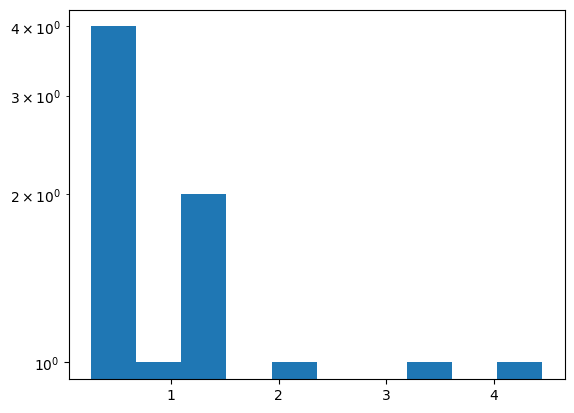

In [335]:
plt.hist(np.random.lognormal(0, 1, 10))
plt.yscale('log')

In [341]:
lllll=new_params(params,1000) 

In [44]:
len(nan_res)

12

In [46]:
for i, (result, p) in enumerate(nan_res):
    for j, item in enumerate(result):
        if np.isnan(item):
            print(i, j, item)

0 5 nan
0 6 nan
0 7 nan
0 8 nan
0 9 nan
0 10 nan
1 43 nan
1 44 nan
1 45 nan
2 87 nan
2 88 nan
2 89 nan
2 90 nan
2 91 nan
2 92 nan
2 93 nan
3 17 nan
3 18 nan
4 9 nan
4 10 nan
4 11 nan
5 13 nan
5 14 nan
5 15 nan
5 16 nan
6 20 nan
6 21 nan
7 154 nan
8 11 nan
8 12 nan
8 13 nan
8 14 nan
8 15 nan
8 16 nan
8 17 nan
8 18 nan
8 19 nan
8 20 nan
8 21 nan
8 22 nan
9 3 nan
10 43 nan
10 44 nan
11 25 nan
11 27 nan


In [47]:
result, p = nan_res[0]

In [50]:
search(p[5])

nan

In [61]:
p_nan = p[5].copy()

In [98]:
p_nan[3] = ('b_B', 7.5)#446)

In [99]:
func = create_eqs_func(**dict(p_nan))
root = fsolve(func, [1, 1], xtol=1e-10, maxfev=10000)
(V_s, E_s) = root
M = J_f(V=V_s, E=E_s, **dict(p_nan))
np.real(linalg.eigvals(M))

array([ 1.03112044e+04, -4.96422801e+00, -5.00000000e-03, -5.00000000e-03,
       -1.98836102e+00, -1.00000000e+00, -5.00000000e-01, -5.00000000e-01,
       -5.00000000e-01])

In [100]:
f_others = create_eqs_others(**dict(p_nan))
(D_s, B_s, C_s, A_s, F_s, U_s) = f_others(root)
kinetic_f(aTc = 0,
          V= V_s, E = E_s, D = D_s, B = B_s, C = C_s, A = A_s, F = F_s, U = U_s,
         **dict(p_nan))

array([[-1.73472348e-18],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 4.37467393e-15],
       [ 0.00000000e+00],
       [-3.44925654e-18],
       [-3.97903932e-13],
       [-8.67361738e-19],
       [ 0.00000000e+00]])

In [105]:
params = [('n', 3),('n_aTc',3), ('b_A',.01), ('b_B',.01), ('b_C',.01), ('b_D',.01), ('b_E',.01), ('b_F',.01), 
          ('mu_V', 1), ('mu_U',1), ('mu_B',0.1), ('mu_C',0.1), ('mu_D',0.1), ('mu_E',0.1), ('mu_F',0.1), 
          ('mu_aTc',0.5), 
          ('K_AB', 1), ('K_BD', 1), ('K_CE', 1), ('K_DA', 1), ('K_EB', 1), ('K_EE',1),
          ('K_FE',1), ('K_aTc',1)]

In [42]:
params = [('n', 3),('n_aTc',3), ('b_A',.01), ('b_B',.01), ('b_C',.01), ('b_D',.01), ('b_E',.01), ('b_F',.01), 
          ('mu_V', 1), ('mu_U',1), ('mu_B',0.1), ('mu_C',0.1), ('mu_D',0.1), ('mu_E',0.0001), ('mu_F',0.1), 
          ('mu_aTc',1), 
          ('K_AB', 10), ('K_BD', 1), ('K_CE', 1), ('K_DA', 1), ('K_EB', 1), ('K_EE',.001),
          ('K_FE',1), ('K_aTc',1)]

In [43]:
#@numba.jit
def new_params_mu(params, size=100):
    i_s = np.random.randint(8, 16, size)
    ds = []
    #ds = [params.copy() for _ in i_s]    
    for index, i in enumerate(i_s):        
    #    ds[index][i] = (ds[index][i][0], np.random.lognormal(0, 10))
        p = params.copy()
        key,v = p[i]        
        p[i] = (key, params[i][1]*np.random.lognormal(0, 1))
        #p[i] = (key, np.random.normal(v, 1))
        #while p[i][1] <= 0:
        #    p[i] = (key, np.random.normal(v, 5))
        #p[i] = (key, v + np.random.lognormal(0, .1))
        ds += [p]
    return ds

In [160]:
pos_res2 = []
zero_res2 = []
for loop in range(1):
    print(loop)
    ds = new_params_mu(params,16*100) 
    with Pool(16) as pool:
        res = pool.map(search_para, ds)
        
    if np.any(np.asarray(res).astype(np.float64)  > 0):
        pos_res2 += [(res, ds)]
    if np.any(np.asarray(res).astype(np.float64)  > -1e-10):
        zero_res2 += [(res, ds)]

0


In [161]:
len(zero_res2)

0

In [177]:
index = np.where(np.asarray(res).astype(np.float64) == np.max(np.asarray(res).astype(np.float64)))[0][0]
ds[index]

[('n', 3),
 ('n_aTc', 3),
 ('b_A', 0.01),
 ('b_B', 0.01),
 ('b_C', 0.01),
 ('b_D', 0.01),
 ('b_E', 0.01),
 ('b_F', 0.01),
 ('mu_V', 1),
 ('mu_U', 1),
 ('mu_B', 0.1),
 ('mu_C', 0.1),
 ('mu_D', 0.1),
 ('mu_E', 2.4700444992947237e-06),
 ('mu_F', 0.1),
 ('mu_aTc', 1),
 ('K_AB', 10),
 ('K_BD', 1),
 ('K_CE', 1),
 ('K_DA', 1),
 ('K_EB', 1),
 ('K_EE', 0.001),
 ('K_FE', 1),
 ('K_aTc', 1)]

In [48]:
%config Completer.use_jedi = False
import numpy as np
import numba
import sys
sys.path.append("/end/home/rh2310/TINN/turing_codebase")

#from solvers.gpu import integrate
#from solvers.turing_models_gpu import Circuit_3954
from solvers import integrate
from solvers.turing_models import Circuit_3954

from matplotlib import pyplot as plt

In [44]:
params = [('n', 3),('n_aTc',3), 
          ('b_A',.01), ('b_B',.01), ('b_C',.01), ('b_D',.01), ('b_E',.01), ('b_F',.01), 
          ('mu_V', 1), ('mu_U',1), 
          ('mu_B',0.1), ('mu_C',0.1), ('mu_D',0.1), ('mu_E',1e-10), ('mu_F',0.1), 
          ('mu_aTc',0.0000001), 
          ('K_AB', 10), ('K_BD', 1), ('K_CE', 1), 
          ('K_DA', 1), ('K_EB', 1), ('K_EE',.001),
          ('K_FE',1), ('K_aTc',1)]

In [61]:
search(params, 10000)

-9.971115462562969e-11

In [46]:
func = create_eqs_func(**dict(params))
root = fsolve(func, [1, 1], xtol=1e-10, maxfev=10000)
(V_s, E_s) = root
M = J_f(V=V_s, E=E_s, **dict(params))
f_others = create_eqs_others(**dict(params))
(D_s, B_s, C_s, A_s, F_s, U_s) = f_others(root)
kinetic_f(aTc = 0,
          V= V_s, E = E_s, D = D_s, B = B_s, C = C_s, A = A_s, F = F_s, U = U_s,
         **dict(params))

array([[ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-2.03565271e-22],
       [ 0.00000000e+00],
       [-1.21758349e-23],
       [ 1.73472348e-28],
       [-1.21758349e-23],
       [ 0.00000000e+00]])

In [47]:
print(U_s)
print(V_s)
print(A_s)
print(B_s)
print(C_s)
print(D_s)
print(E_s)
print(F_s)

0.010099999999989999
0.00010000001030299941
0.010099999999989999
0.00010000001030299941
0.010099999999989999
0.00010000000001000001
0.010090265152252509
0.00010000000001000001


In [54]:
n = (64, 64)
L = (1, 1)
Ds = np.array([1, 2, 0, 0, 0, 0, 0, 0 ,0])
aTc_s = 0.0

c0 = np.zeros((9, n[0], n[1]))
c0[0, :, :] = U_s + np.random.normal(scale=U_s*.1, size=(n[0], n[1]))
c0[1, :, :] = V_s + np.random.normal(scale=V_s*.1, size=(n[0], n[1]))
c0[2, :, :] = A_s + np.random.normal(scale=A_s*.1, size=(n[0], n[1]))
c0[3, :, :] = B_s + np.random.normal(scale=B_s*.1, size=(n[0], n[1]))
c0[4, :, :] = C_s + np.random.normal(scale=C_s*.1, size=(n[0], n[1]))
c0[5, :, :] = D_s + np.random.normal(scale=D_s*.1, size=(n[0], n[1]))
c0[6, :, :] = E_s + np.random.normal(scale=E_s*.1, size=(n[0], n[1]))
c0[7, :, :] = F_s + np.random.normal(scale=F_s*.1, size=(n[0], n[1]))
c0[8, :, :] = 0#aTc_s+.001
  
params_d = dict(params)
f_args = (params_d['b_A'], 
          params_d['b_B'],
          params_d['b_C'],
          params_d['b_D'],
          params_d['b_E'],
          params_d['b_F'],
          params_d['n_aTc'],
          params_d['K_AB'],
          params_d['K_BD'],
          params_d['K_CE'],
          params_d['K_DA'],
          params_d['K_EB'],
          params_d['K_EE'],
          params_d['K_FE'],
          params_d['K_aTc'],
          params_d['mu_U'],
          params_d['mu_V'],
          params_d['mu_B'],
          params_d['mu_C'],
          params_d['mu_D'],
          params_d['mu_E'],
          params_d['mu_F'],
          params_d['mu_aTc'])
t = np.linspace(0, .1, 1000)
dt = 0.0001

In [55]:
sol = integrate(c0, t, dt, n, L, Ds, Circuit_3954, f_args)

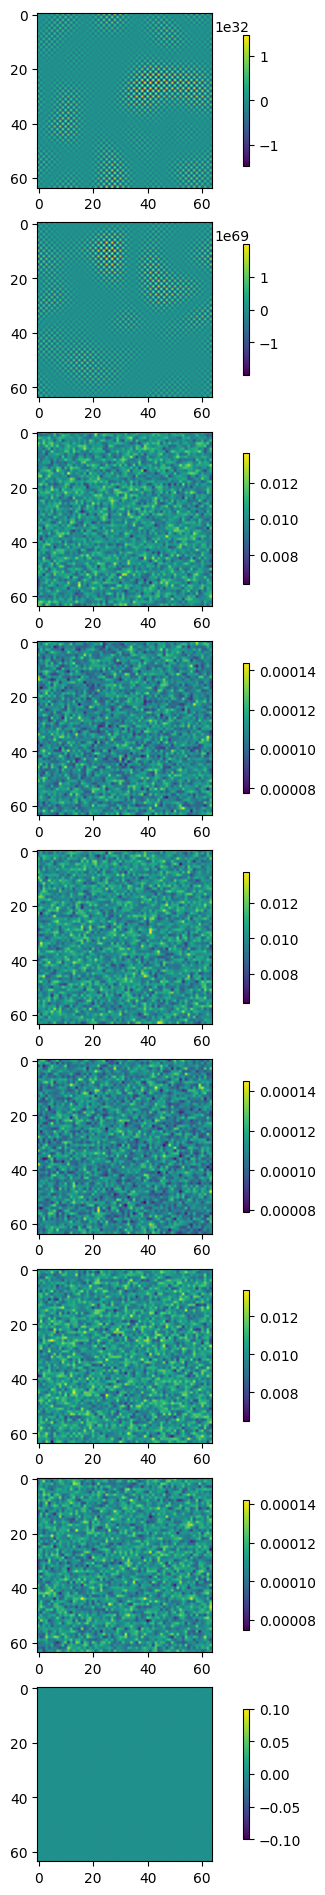

In [56]:
index =100
_ = plt.figure(figsize=(8,24))
for i in range(9):
    
    plt.subplot(9, 1, i+1)
    plt.imshow(sol[i,:,:, index])
    plt.colorbar(shrink=.75)
plt.show()

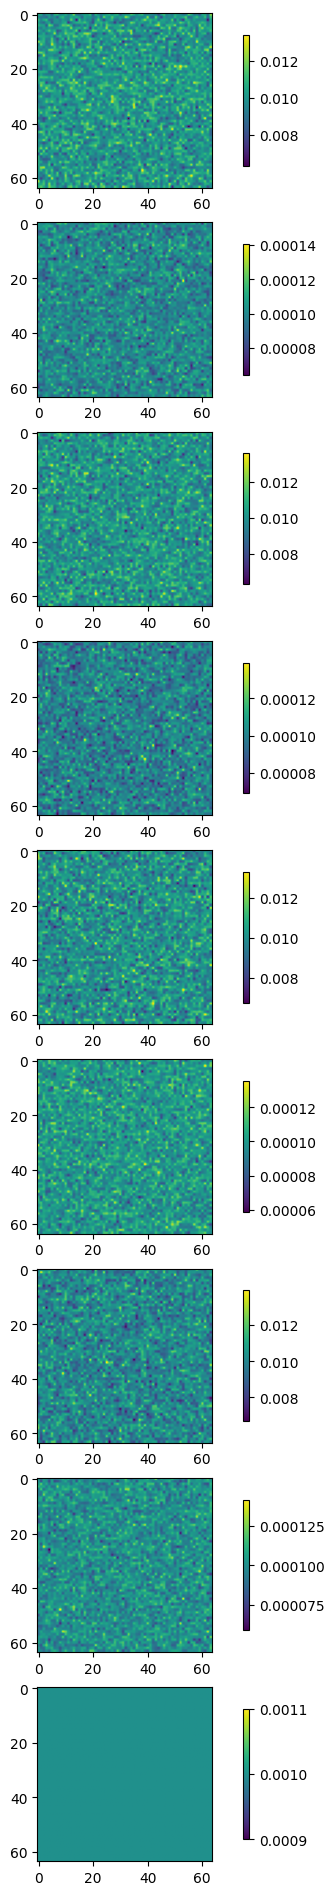

In [18]:
index =-1
_ = plt.figure(figsize=(8,24))
for i in range(9):
    
    plt.subplot(9, 1, i+1)
    plt.imshow(c0[i,:,:])
    plt.colorbar(shrink=.75)
plt.show()